In [1]:
#@title Imports and Installations

import pandas as pd
import numpy as np

!pip install textstat

import textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.9 MB/s eta 0:00:00


In [2]:
#@title Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd

Mounted at /content/drive


# Fortunoff

In [3]:
#@title Import Data

sheet_id = "1qlMtBcWgCDguyj8foN4fSCyEkzr9r-Gv7ILRiKUGjho"
worksheet_name = "Disambiguated Questions"
sh = gc.open_by_key(sheet_id)
worksheet = sh.worksheet(worksheet_name)
fortunoff_qs = pd.DataFrame(worksheet.get_all_records())

In [ ]:
fortunoff_qs.head()

,,file_num,sent_num,manual_index,text,context,chain_of_thought,contains_unresolved_pronoun,enough_context_provided,disambiguated_text,was_disambiguated,Inputted_Questions
0,0,1,2,2,Where are you from?,CREW: nan\nINTERVIEWER: We're going to go back...,The question 'Where are you from?' does not co...,FALSE,TRUE,,FALSE,Where are you from?
1,1,1,4,4,Where?,CREW: nan\nINTERVIEWER: We're going to go back...,"The question ""Where?"" does not contain any pro...",FALSE,TRUE,,FALSE,Where?
2,2,1,6,6,Do you remember the old city?,CREW: nan\nINTERVIEWER: We're going to go back...,"The question contains the pronoun 'you', which...",FALSE,TRUE,,FALSE,Do you remember the old city?
3,3,1,8,8,"As a Jewish person, did you feel any differenc...",CREW: nan\nINTERVIEWER: We're going to go back...,"The pronoun ""you"" in the question refers to th...",FALSE,TRUE,,FALSE,"As a Jewish person, did you feel any differenc..."
4,4,1,10,10,Would you mind repeating my question so that i...,CREW: nan\nINTERVIEWER: We're going to go back...,The question does not contain any ambiguous pr...,FALSE,TRUE,,FALSE,Would you mind repeating my question so that i...


In [ ]:
# get question and answer word count and save as a column in the dataframe
qword_count = []
for index in fortunoff_qs.index: # Iterate using the index of qs_df
    qword_count.append(len(str(fortunoff_qs.loc[index, 'Inputted_Questions']).split()))

fortunoff_qs['question_length'] = qword_count

In [ ]:
fortunoff_qs.head()

,,file_num,sent_num,manual_index,text,context,chain_of_thought,contains_unresolved_pronoun,enough_context_provided,disambiguated_text,was_disambiguated,Inputted_Questions,question_length
0,0,1,2,2,Where are you from?,CREW: nan\nINTERVIEWER: We're going to go back...,The question 'Where are you from?' does not co...,FALSE,TRUE,,FALSE,Where are you from?,4
1,1,1,4,4,Where?,CREW: nan\nINTERVIEWER: We're going to go back...,"The question ""Where?"" does not contain any pro...",FALSE,TRUE,,FALSE,Where?,1
2,2,1,6,6,Do you remember the old city?,CREW: nan\nINTERVIEWER: We're going to go back...,"The question contains the pronoun 'you', which...",FALSE,TRUE,,FALSE,Do you remember the old city?,6
3,3,1,8,8,"As a Jewish person, did you feel any differenc...",CREW: nan\nINTERVIEWER: We're going to go back...,"The pronoun ""you"" in the question refers to th...",FALSE,TRUE,,FALSE,"As a Jewish person, did you feel any differenc...",11
4,4,1,10,10,Would you mind repeating my question so that i...,CREW: nan\nINTERVIEWER: We're going to go back...,The question does not contain any ambiguous pr...,FALSE,TRUE,,FALSE,Would you mind repeating my question so that i...,12


In [ ]:
#@title Remove Blacklisted Words

sheet_id = "1Fn-mjFXyyx-P2jOHV6hvCDDG5weqe5_fPkbLEwEejDY"
worksheet_name = "Fortunoff"
sh = gc.open_by_key(sheet_id)
worksheet = sh.worksheet(worksheet_name)
fortunoff_100 = pd.DataFrame(worksheet.get_all_records())

In [ ]:
blacklist = fortunoff_100['text'][fortunoff_100['Remove? [Billy]'] == 'Yes']
blacklist = blacklist.tolist()
blacklist

['OK?', 'And?', 'Mhm?', 'Yes?']

In [ ]:
special_chars = [all(not c.isalnum() for c in mystring) for mystring in fortunoff_qs['Inputted_Questions']]
fortunoff_qs.loc[special_chars]
fortunoff_qs = fortunoff_qs[np.logical_not(special_chars)]

fortunoff_qs = fortunoff_qs[~fortunoff_qs['Inputted_Questions'].isin(blacklist)]

In [ ]:
fortunoff_qs

,,file_num,sent_num,manual_index,text,context,chain_of_thought,contains_unresolved_pronoun,enough_context_provided,disambiguated_text,was_disambiguated,Inputted_Questions,question_length
0,0,1,2,2,Where are you from?,CREW: nan\nINTERVIEWER: We're going to go back...,The question 'Where are you from?' does not co...,FALSE,TRUE,,FALSE,Where are you from?,4
1,1,1,4,4,Where?,CREW: nan\nINTERVIEWER: We're going to go back...,"The question ""Where?"" does not contain any pro...",FALSE,TRUE,,FALSE,Where?,1
2,2,1,6,6,Do you remember the old city?,CREW: nan\nINTERVIEWER: We're going to go back...,"The question contains the pronoun 'you', which...",FALSE,TRUE,,FALSE,Do you remember the old city?,6
3,3,1,8,8,"As a Jewish person, did you feel any differenc...",CREW: nan\nINTERVIEWER: We're going to go back...,"The pronoun ""you"" in the question refers to th...",FALSE,TRUE,,FALSE,"As a Jewish person, did you feel any differenc...",11
4,4,1,10,10,Would you mind repeating my question so that i...,CREW: nan\nINTERVIEWER: We're going to go back...,The question does not contain any ambiguous pr...,FALSE,TRUE,,FALSE,Would you mind repeating my question so that i...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16574,16581,200,363,73794,Where does it leave you?,SUBJECT: Now everybody was becoming increasing...,The question 'Where does it leave you?' contai...,TRUE,FALSE,,FALSE,Where does it leave you?,5
16575,16582,200,365,73796,Where does all this leave you?,SUBJECT: Now everybody was becoming increasing...,"The pronoun ""you"" in the question refers to th...",FALSE,TRUE,,FALSE,Where does all this leave you?,6
16576,16583,200,379,73810,Her mother?,"SUBJECT: And it was the notion that, especiall...","In the previous context, the only mention of '...",TRUE,TRUE,What happened to Iza's mother?,TRUE,What happened to Iza's mother?,5
16577,16584,200,383,73814,Do you know how the others died?,"SUBJECT: So this is, in a way, why I think the...","In the provided context, the pronoun ""the othe...",TRUE,FALSE,,FALSE,Do you know how the others died?,7


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fortunoff_lengths = fortunoff_qs['Inputted_Questions'].groupby(fortunoff_qs['question_length']).count()

fortunoff_lengths

,Inputted_Questions
question_length,
1,785
2,871
3,1222
4,1957
5,1891
6,1678
7,1511
8,1333
9,1028


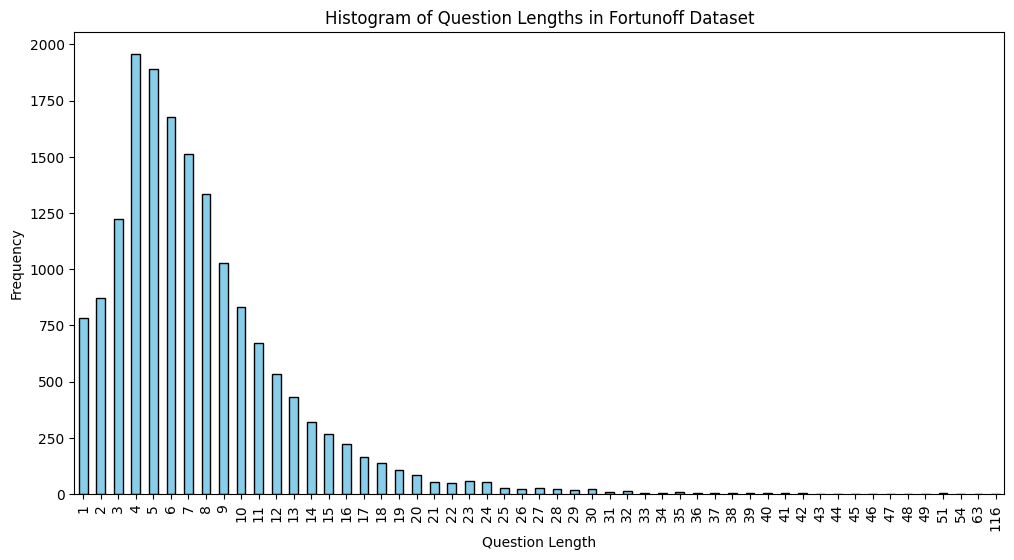

In [ ]:
#@title Generate Histogram of Fortunoff Question Length Distributions

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
fortunoff_lengths.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')

plt.xlabel("Question Length")
plt.ylabel("Frequency")
plt.title("Histogram of Question Lengths in Fortunoff Dataset")

plt.show()

In [ ]:
#@title Generate Flesch-Kincaid Scores

fk_scores_fortunoff = []

for question in fortunoff_qs['Inputted_Questions']:
    fk_scores_fortunoff.append(textstat.flesch_kincaid_grade(question))

fortunoff_qs['fk_score'] = fk_scores_fortunoff

fortunoff_sorted = fortunoff_qs.sort_values(by=['fk_score'])

fortunoff_sorted

,,file_num,sent_num,manual_index,text,context,chain_of_thought,contains_unresolved_pronoun,enough_context_provided,disambiguated_text,was_disambiguated,Inputted_Questions,question_length,fk_score
13118,13122,161,82,57696,Hm?,INTERVIEWER: You were surprised to find someth...,"In the provided context, there are no pronouns...",FALSE,TRUE,,FALSE,Hm?,1,-15.3
14422,14429,173,354,62734,Hm?,SUBJECT: I was criticized of always trying to ...,The question 'Hm?' does not contain any pronou...,FALSE,TRUE,,FALSE,Hm?,1,-15.3
5853,5856,71,16,27252,Hm?,"CREW: Oh, god. He's a real character, he is.\n...",The question 'Hm?' does not contain any pronou...,FALSE,TRUE,,FALSE,Hm?,1,-15.3
11705,11709,147,79,50314,Hmm?,"SUBJECT: Now, there was a little benefit from ...",The Question 'Hmm?' does not contain any prono...,FALSE,TRUE,,FALSE,Hmm?,1,-15.3
3796,3797,44,233,16626,Hm?,INTERVIEWER: Gusen. How long after the liberat...,The question 'Hm?' does not contain any pronou...,FALSE,TRUE,,FALSE,Hm?,1,-15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,3989,47,95,17279,Anniversary?,INTERVIEWER: She was a statuesque woman? What ...,"The question ""Anniversary?"" does not contain a...",FALSE,FALSE,,FALSE,Anniversary?,1,43.8
451,452,7,177,2614,Genealogy?,SUBJECT: And a new group of teachers came in. ...,"The question ""Genealogy?"" does not contain any...",FALSE,TRUE,,FALSE,Genealogy?,1,43.8
11399,11403,139,180,48821,"It says that you, the undersigned, release a H...","SUBJECT: But one time, I could not help her. A...","The question contains the pronoun ""me"" which r...",FALSE,TRUE,,FALSE,"It says that you, the undersigned, release a H...",116,49.3
212,212,4,20,865,Czechoslovakia?,SUBJECT: My name is Sylvia Brodach.\nINTERVIEW...,"The question ""Czechoslovakia?"" does not contai...",FALSE,TRUE,,FALSE,Czechoslovakia?,1,55.6


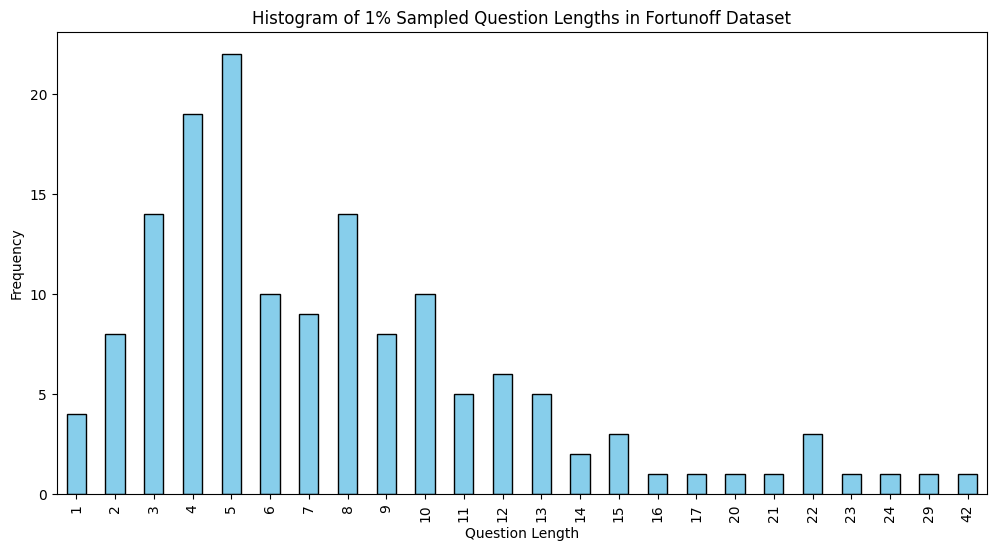

--were dehumanizing people, were violating human rights, why wasn't there a moral outrage from the average person?
Do you remember the words that the children shouted?
Men and women?
Did you speak German or any other language?
Do you remember that moment?
But no?
When?
Someone in your travels gave you the yellow star?
A certain surprise about some things?
And you wanted to get on that?
Did you ever hear about medical experiments?
Do you speak German?
What were your plans?
And when you were born, OK?
Did you hear any whistling?
How did you get to America?
Which side?
So what did you see?
What was the house like?
Treblinka?
How many-- days?
Remember, the first sense of the war, the first things you personally saw?
Did you respond to that at all, or did you--
What did you do?
Were you-- were you trying to help other people?
And the lager commander gave us the-- he told us.
It was before the Kristallnacht?
What were the Jewish officials in the camp like?
Which sections?
I just wondered if 

In [ ]:
#@title Randomly Sample Questions

import matplotlib.pyplot as plt

fortunoff_qs_random = fortunoff_qs.sample(n=150, random_state=42)

fortunoff_lengths_random = fortunoff_qs_random['Inputted_Questions'].groupby(fortunoff_qs_random['question_length']).count()

plt.figure(figsize=(12, 6))
fortunoff_lengths_random.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Question Length")
plt.ylabel("Frequency")
plt.title("Histogram of 1% Sampled Question Lengths in Fortunoff Dataset")

plt.show()

for question in fortunoff_qs_random['Inputted_Questions']:
    print(question)

# Boder

In [ ]:
#@title Import Data

sheet_id = "16kCtRyeSZ8-8t852-KE2uk16_xxYPmwpwvWT0YVoloA"
worksheet_name = "Pronoun Disambiguation"
sh = gc.open_by_key(sheet_id)
worksheet = sh.worksheet(worksheet_name)
boder_qs = pd.DataFrame(worksheet.get_all_records())

In [ ]:
boder_qs

,text,inputted_questions
0,Let me tell you frankly : Do not tell me some...,Let me tell you frankly : Do not tell me some...
1,… until today. But to you personally. Where di...,… until today. But to you personally. Where di...
2,How old were you then? What grade were you in ...,How old were you then? What grade were you in ...
3,What means “first grade”? The highest grade?,What means “first grade”? The highest grade?
4,… of the “Volks-”?,… of the “Volks-”?
...,...,...
14768,"Was she Jewish, a Jewish girl friend?","Was your girlfriend Jewish, a Jewish girl friend?"
14769,And she too was there as an Aryan woman?,And the girlfriend was there as an Aryan woman?
14770,Found courage?,Found courage?
14771,So?,So?


In [ ]:
# add column for length of inputted questions

qword_count = []
for index in boder_qs.index: # Iterate using the index of qs_df
    qword_count.append(len(str(boder_qs.loc[index, 'inputted_questions']).split()))

boder_qs['text_length'] = qword_count

boder_qs

,text,inputted_questions,text_length
0,Let me tell you frankly : Do not tell me some...,Let me tell you frankly : Do not tell me some...,88
1,… until today. But to you personally. Where di...,… until today. But to you personally. Where di...,54
2,How old were you then? What grade were you in ...,How old were you then? What grade were you in ...,11
3,What means “first grade”? The highest grade?,What means “first grade”? The highest grade?,7
4,… of the “Volks-”?,… of the “Volks-”?,4
...,...,...,...
14768,"Was she Jewish, a Jewish girl friend?","Was your girlfriend Jewish, a Jewish girl friend?",8
14769,And she too was there as an Aryan woman?,And the girlfriend was there as an Aryan woman?,9
14770,Found courage?,Found courage?,2
14771,So?,So?,1


In [ ]:
#@title Remove Blacklisted Words

sheet_id = "1Fn-mjFXyyx-P2jOHV6hvCDDG5weqe5_fPkbLEwEejDY"
worksheet_name = "Boder"
sh = gc.open_by_key(sheet_id)
worksheet = sh.worksheet(worksheet_name)
boder_100 = pd.DataFrame(worksheet.get_all_records())

In [ ]:
boder_blacklist = boder_100['text'][boder_100['Remove? [Billy]'] == 'Yes']
boder_blacklist = boder_blacklist.tolist()
blacklist = blacklist + boder_blacklist
blacklist = list(set(blacklist))
blacklist

['Aha. Nu?',
 'Yes?',
 'What does that mean?',
 'Nu?',
 'Yes. And?',
 'unintelligible ?',
 'And?',
 'Go on.',
 'Yes? Nu?',
 'Yes, and then?',
 'Yes, go on.',
 'OK?',
 'Yes. And then?',
 'Yes. Well?',
 'I see. Well?',
 'What?',
 'Nu, go on.',
 'Well, go on.',
 'Yes, nu?',
 'Yes, well?',
 'Yes. Nu?',
 'Yes, and?',
 'Well?',
 'Hm. Nu?',
 'Mhm?']

In [ ]:
special_chars = [all(not c.isalnum() for c in mystring) for mystring in boder_qs['inputted_questions']]
boder_qs.loc[special_chars]
boder_qs = boder_qs[np.logical_not(special_chars)]

boder_qs = boder_qs[~boder_qs['inputted_questions'].isin(blacklist)]

In [ ]:
boder_lengths = boder_qs['inputted_questions'].groupby(boder_qs['text_length']).count()

boder_lengths

,inputted_questions
text_length,
1,559
2,969
3,1115
4,1226
5,1472
...,...
88,1
89,1
93,1


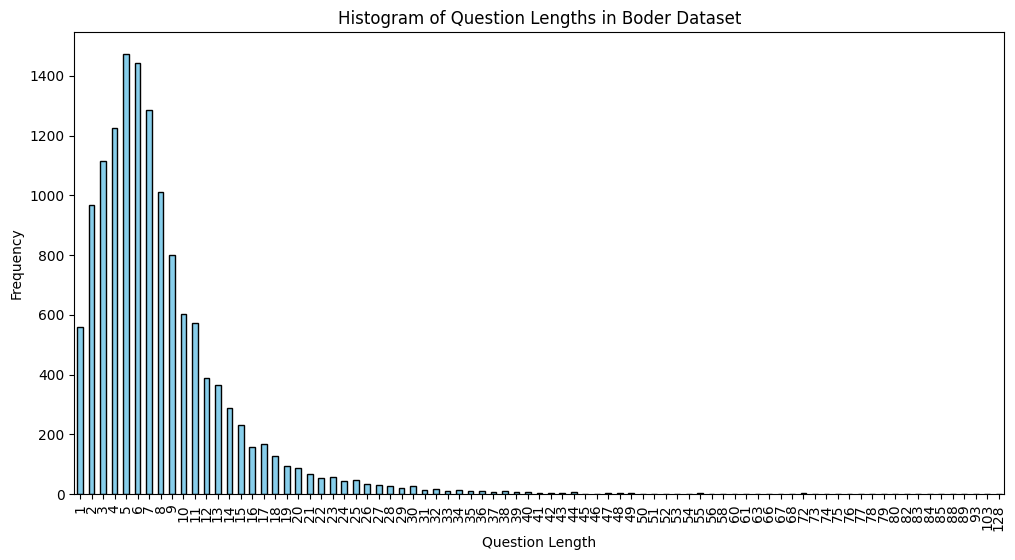

In [ ]:
#@title Generate Histogram of Boder Question Length Distributions

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))
boder_lengths.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')

plt.xlabel("Question Length")
plt.ylabel("Frequency")
plt.title("Histogram of Question Lengths in Boder Dataset")

plt.show()

In [ ]:
#@title Generate Flesch-Kincaid Scores

fk_scores_boder = []

for question in boder_qs['inputted_questions']:
    fk_scores_boder.append(textstat.flesch_kincaid_grade(question))

boder_qs['fk_score'] = fk_scores_boder

boder_sorted = boder_qs.sort_values(by=['fk_score'])

boder_sorted

,text,inputted_questions,text_length,fk_score
1968,Hm. Now?,Hm. Now?,2,-9.0
14072,"Hm, nu?","Hm, nu?",2,-9.0
6506,"Hm, yes?","Hm, yes?",2,-9.0
4726,Hm. Nu?,Hm. Nu?,2,-9.0
5297,Hm. So?,Hm. So?,2,-9.0
...,...,...,...,...
3383,Stertorously/rattlingly?,Stertorously/rattlingly?,1,43.8
11604,… exterminated?,… exterminated?,2,43.8
41,… evacuated?,… evacuated?,2,43.8
952,Unfortunately?,Unfortunately?,1,43.8


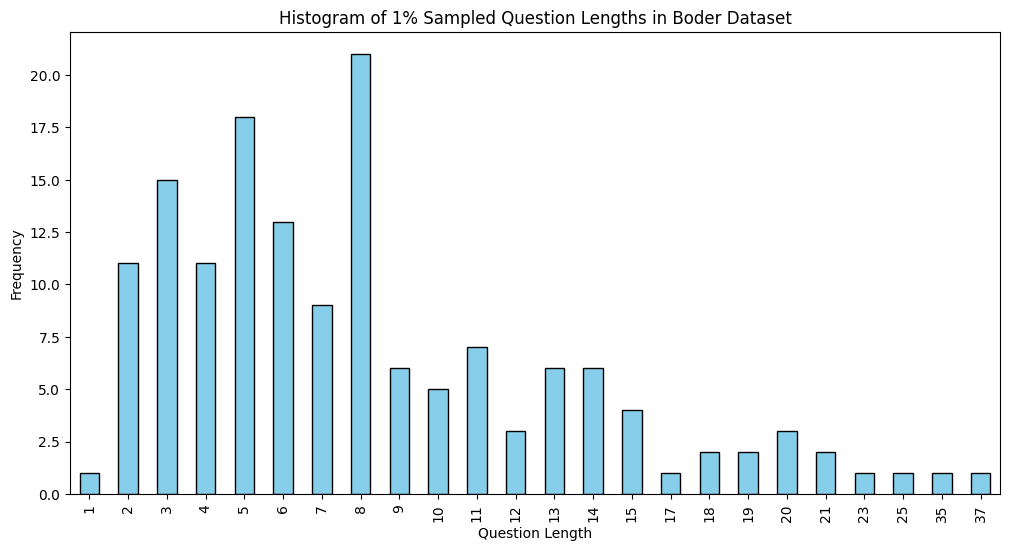

All right. Well…  Lift that? Do you smoke?
Where did they get the pajamas?
Yes, and so?  Well what happened in Drancy?
Ester here?
Do you talk Yiddish better?
What is your name?
How?! It means you were in Vichy at the same time with Pétain?
For the soldiers?
What does that mean? Are there not-normal cattle cars?
… Grese?
To stay where?
Which mother?
Where stood the truck?
Did they shoot…
How many people were there?
How many people did you have who reached —
What did your father work in?
A hundred girls, you mean?
… a Red Cross?
Everything became more expensive?
 What do you mean, “it is understood?”
Now, tell me, I have still this other question. You started telling me something about the character of the capos. You said that before. What were they? You say, not all of them were criminals?
But you said something about Kharkov.
I am asking whether your mother knew at the time that you were arrested.
Alright. Shall we move on? You only waited in Belsen-Belsen. And how did your daughter g

In [ ]:
#@title Randomly Sample Questions

import matplotlib.pyplot as plt

boder_qs_random = boder_qs.sample(n=150, random_state=42)

boder_lengths_random = boder_qs_random['inputted_questions'].groupby(boder_qs_random['text_length']).count()

plt.figure(figsize=(12, 6))
boder_lengths_random.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Question Length")
plt.ylabel("Frequency")
plt.title("Histogram of 1% Sampled Question Lengths in Boder Dataset")

plt.show()

for question in boder_qs_random['inputted_questions']:
    print(question)

In [ ]:
break

SyntaxError: 'break' outside loop (<ipython-input-25-6aaf1f276005>, line 1)

# Create JSON File

In [4]:
sheet_id = "1iLWrnCjj5pkWqwieHrTYcuPn9URYVGTBF3zlnUHb1gI"
worksheet_name = "Boder OpenAI Eval"
sh = gc.open_by_key(sheet_id)
worksheet = sh.worksheet(worksheet_name)
boder_eval = pd.DataFrame(worksheet.get_all_records())
worksheet_name = "Fortunoff OpenAI Eval"
sh = gc.open_by_key(sheet_id)
worksheet = sh.worksheet(worksheet_name)
fortunoff_eval = pd.DataFrame(worksheet.get_all_records())

In [5]:
boder_eval['rewrite_eval'] = [elem == "Yes" for elem in boder_eval['rewrite_eval']]
fortunoff_eval['rewrite_eval'] = [elem == "Yes" for elem in fortunoff_eval['rewrite_eval']]

In [ ]:
boder_eval

,,text,rewrite_eval,reasoning_for_rewriting,reasoning_to_not_rewrite,good_reason,rewritten_question,Manual Reason,Reason Writer,Cross-Checked,Final_Reason
0,0,All right. Well… Lift that? Do you smoke?,False,The question lacks clarity regarding what 'Lif...,"The second part of the question, 'Do you smoke...",Yes,Could you please clarify what you mean by 'Lif...,,,,"The second part of the question, 'Do you smoke..."
1,1,Where did they get the pajamas?,False,The question lacks context about who 'they' re...,The question is straightforward in asking abou...,Yes,"In the context of the Holocaust, where did the...",,,,The question is straightforward in asking abou...
2,2,"Yes, and so? Well what happened in Drancy?",False,The question lacks specific details about what...,The phrase 'Well what happened in Drancy?' cou...,No,Can you describe your experiences in Drancy du...,The question is straightforward and asks what ...,Billy,Yes,The question is straightforward and asks what ...
3,3,Ester here?,True,The question lacks context about who Ester is ...,The question could be understood as a simple i...,Yes,"Is Ester here, and if so, could you please let...",,,,The question lacks context about who Ester is ...
4,4,Do you talk Yiddish better?,False,The question lacks context regarding the speak...,The question is straightforward in asking abou...,Yes,"In your experience as a Holocaust survivor, do...",,,,The question is straightforward in asking abou...
...,...,...,...,...,...,...,...,...,...,...,...
152,152,And where did you spend those days — in the ho...,True,,,,,,,,The question lacks context about the specific ...
153,153,"So when he worked in the factory, did he come ...",True,,,,,,,,The question lacks specific information about ...
154,154,Did you have a toilet in the RR-car?,False,,,,,,,,The question is straightforward and directly a...
155,155,Yes. And you were the youngest in the family?,False,,,,,,,,The question is straightforward and can be und...


In [6]:
boder_eval['Final_Reason'] = [elem.replace("\"", "'") for elem in boder_eval['Final_Reason']]
fortunoff_eval['Final_Reason'] = [elem.replace("\"", "'") for elem in fortunoff_eval['Final_Reason']]

In [7]:
JSON_template = """{"messages": [{"role": "system", "content": "{}"}, {"role": "user", "content": "{}"}, {"role": "assistant", "content": "{}"}]}"""

In [8]:
import json

round_list = []  # Initialize an empty list to store JSON objects

for idx, row in boder_eval.iterrows():
  # Creating a dictionary with the desired structure
  data = {
      "messages": [
          {"role": "system", "content": "Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason: "},
          {"role": "user", "content": row['text']},
          {"role": "assistant", "content": str(row['rewrite_eval']) + ". Reason: " + row['Final_Reason']}
      ]
  }
  # Append the JSON object to the list
  round_list.append(data)

# Write each JSON object to the file on a new line
with open("sample.jsonl", "w") as outfile:
    for json_obj in round_list:
        outfile.write(json.dumps(json_obj) + "\n") # Add a newline character after each JSON object

In [ ]:
round_list = round_list[:-1]
print(round_list)
with open("sample.jsonl", "w") as outfile:
    for json_obj in round_list:
        outfile.write(json.dumps(json_obj) + "\n") # Add a newline character after each JSON object

[{'messages': [{'role': 'system', 'content': 'Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason: '}, {'role': 'user', 'content': 'All right. Well…  Lift that? Do you smoke?'}, {'role': 'assistant', 'content': "False. Reason: The second part of the question, 'Do you smoke?', is straightforward and can stand alone as a complete question."}]}, {'messages': [{'role': 'system', 'content': 'Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason: '}, {'role': 'user', 'content': 'Where did they get the pajamas?'}, {'role': 'assistant', 'content': 'False. 

In [9]:
!pip install tiktoken
import json
import tiktoken # for token counting
import numpy as np
from collections import defaultdict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:00


In [ ]:
round[420:440]

'", "content": "False'

In [14]:
data_path = "/content/sample.jsonl"


# A function to help check if a string is valid JSON.
def is_valid_json(json_string):
    try:
        json.loads(json_string)
    except ValueError:
        print(json_string)
        return False
    return True


# Load the dataset
# Open the file in read mode
with open(data_path, 'r', encoding='utf-8') as f:
    # Read all lines from the file
    lines = f.readlines()
    # Decode each line as a JSON object if the line is not empty and contains valid JSON.
    # Otherwise ignore it.
    dataset = [json.loads(line) for line in lines if line.strip() and is_valid_json(line)]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)





Num examples: 157
First example:
{'role': 'system', 'content': 'Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason: '}
{'role': 'user', 'content': 'All right. Well…  Lift that? Do you smoke?'}
{'role': 'assistant', 'content': "False. Reason: The second part of the question, 'Do you smoke?', is straightforward and can stand alone as a complete question."}


In [11]:
def check_errors(dataset):
  format_errors = defaultdict(int)

  for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue

      messages = ex.get("messages", None)
      if not messages:
        format_errors["missing_messages_list"] += 1
        continue

      for message in messages:
        if "role" not in message or "content" not in message:
          format_errors["message_missing_key"] += 1

        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
          format_errors["message_unrecognized_key"] += 1

        if message.get("role", None) not in ("system", "user", "assistant", "function"):
          format_errors["unrecognized_role"] += 1

        content = message.get("content", None)
        function_call = message.get("function_call", None)

        if (not content and not function_call) or not isinstance(content, str):
          format_errors["missing_content"] += 1

      if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

  if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
      print(f"{k}: {v}")
  else:
    print("No errors found")

check_errors(dataset)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [15]:
def check_errors(dataset):
    format_errors = defaultdict(int)

    for ex in dataset:
        if not isinstance(ex, dict):
            format_errors["data_type"] += 1
            continue

        messages = ex.get("messages", None)
        if not messages:
            format_errors["missing_messages_list"] += 1
            continue

        for message in messages:
            if "role" not in message or "content" not in message:
                format_errors["message_missing_key"] += 1

            if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
                format_errors["message_unrecognized_key"] += 1

            if message.get("role", None) not in ("system", "user", "assistant", "function"):
                format_errors["unrecognized_role"] += 1

            content = message.get("content", None)
            function_call = message.get("function_call", None)

            if (not content and not function_call) or not isinstance(content, str):
                format_errors["missing_content"] += 1

        if not any(message.get("role", None) == "assistant" for message in messages):
            format_errors["example_missing_assistant_message"] += 1

    if format_errors:
        print("Found errors:")
        for k, v in format_errors.items():
            print(f"{k}: {v}")
    else:
        print("No errors found")

check_errors(dataset)

No errors found


In [ ]:
with open("training.jsonl", "w") as outfile:
    for json_obj in dataset:
        outfile.write(json.dumps(json_obj) + "\n")



In [16]:
from openai import OpenAI

#@title Step 3: Authenticate Notebook's Access

# Import Colab Secrets userdata module
from google.colab import userdata
import os

#Set the environment variable to the access token

os.environ["OPEN_AI_KEY"] = userdata.get('OPEN_AI_PROJECT_KEY')

client = OpenAI(api_key=os.environ.get("OPEN_AI_KEY"))



In [ ]:
training_file = client.files.create(
    file=open("training.jsonl", "rb"),
    purpose='fine-tune'
)

training_file_id = training_file.id


# Start the fine-tuning job
job = client.fine_tuning.jobs.create(
    training_file=training_file_id,  # Use the file ID here
    model="gpt-4o-2024-08-06"
)


In [ ]:

completion = client.chat.completions.create(
    model="ft:gpt-4o-mini-2024-07-18:ucla-cultural-heritage-ai-lab::B5fOGab0",
    messages=[
        {"role": "system", "content": "Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason:"},
        {"role": "user", "content": "Remember, the first sense of the war, the first things you personally saw?"}
    ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='False. Reason: The question is straightforward in asking for personal experiences of the war, which can elicit a range of responses regardless of specific context.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)


In [ ]:
Boder_file = "B5fOGab0"

In [ ]:
import json

round_list = []  # Initialize an empty list to store JSON objects

for idx, row in fortunoff_eval.iterrows():
  # Creating a dictionary with the desired structure
  data = {
      "messages": [
          {"role": "system", "content": "Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason: "},
          {"role": "user", "content": row['text']},
          {"role": "assistant", "content": str(row['rewrite_eval']) + ". Reason: " + row['Final_Reason']}
      ]
  }
  # Append the JSON object to the list
  round_list.append(data)

# Write each JSON object to the file on a new line
with open("sample_fortunoff.jsonl", "w") as outfile:
    for json_obj in round_list:
        outfile.write(json.dumps(json_obj) + "\n") # Add a newline character after each JSON object

In [ ]:
data_path = "/content/sample_fortunoff.jsonl"


# A function to help check if a string is valid JSON.
def is_valid_json(json_string):
    try:
        json.loads(json_string)
    except ValueError:
        print(json_string)
        return False
    return True


# Load the dataset
# Open the file in read mode
with open(data_path, 'r', encoding='utf-8') as f:
    # Read all lines from the file
    lines = f.readlines()
    # Decode each line as a JSON object if the line is not empty and contains valid JSON.
    # Otherwise ignore it.
    dataset = [json.loads(line) for line in lines if line.strip() and is_valid_json(line)]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)


Num examples: 157
First example:
{'role': 'system', 'content': 'Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not. Justify your choice with reasoning. Your response should be in the format of decision. reason: '}
{'role': 'user', 'content': "--were dehumanizing people, were violating human rights, why wasn't there a moral outrage from the average person?"}
{'role': 'assistant', 'content': 'True. Reason: The question lacks clarity regarding the specific time period and location where people were being dehumanized and having their rights violated.'}


In [ ]:
check_errors(dataset)



No errors found


In [ ]:
training_file = client.files.create(
    file=open("sample_fortunoff.jsonl", "rb"),
    purpose='fine-tune'
)

training_file_id = training_file.id


# Start the fine-tuning job
job = client.fine_tuning.jobs.create(
    training_file=training_file_id,  # Use the file ID here
    model="gpt-4o-2024-08-06"
)

In [19]:
og_boder = boder_eval[0:150]
og_fortunoff = fortunoff_eval[0:150]
extra_qs = boder_eval[150:]

boder_sample = og_boder.sample(n=75, random_state=42)
fortunoff_sample = og_fortunoff.sample(n=75, random_state=42)
combined_sample = pd.concat([boder_sample, fortunoff_sample, extra_qs])

round_list = []  # Initialize an empty list to store JSON objects

for idx, row in combined_sample.iterrows():
  # Creating a dictionary with the desired structure
  data = {
      "messages": [
          {"role": "system", "content": "Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not.  The word, you, refers to the interviewee and does not need clarification. Justify your choice with reasoning. Your response should be in the format of decision. reason: "},
          {"role": "user", "content": row['text']},
          {"role": "assistant", "content": str(row['rewrite_eval']) + ". Reason: " + row['Final_Reason']}
      ]
  }
  # Append the JSON object to the list
  round_list.append(data)

# Write each JSON object to the file on a new line
with open("sample_combined.jsonl", "w") as outfile:
    for json_obj in round_list:
        outfile.write(json.dumps(json_obj) + "\n") # Add a newline character after each JSON object

In [ ]:
combined_sample.tail(7)

,,text,rewrite_eval,reasoning_for_rewriting,reasoning_to_not_rewrite,good_reason,rewritten_question,Manual Reason,Reason Writer,Cross-Checked,Final_Reason
150,150,Talk a little slower.,False,,,,,,,,The question is a direct request for clarifica...
151,151,"Near the Estonian border, but you are from Lat...",False,,,,,,,,The question is straightforward inquiring abou...
152,152,And where did you spend those days — in the ho...,True,,,,,,,,The question lacks context about the specific ...
153,153,"So when he worked in the factory, did he come ...",True,,,,,,,,The question lacks specific information about ...
154,154,Did you have a toilet in the RR-car?,False,,,,,,,,The question is straightforward and directly a...
155,155,Yes. And you were the youngest in the family?,False,,,,,,,,The question is straightforward and can be und...
156,156,What are you paying for the apartment?,False,,,,,,,,The question is straightforward and can be und...


In [20]:
data_path = "/content/sample_combined.jsonl"


# A function to help check if a string is valid JSON.
def is_valid_json(json_string):
    try:
        json.loads(json_string)
    except ValueError:
        print(json_string)
        return False
    return True


# Load the dataset
# Open the file in read mode
with open(data_path, 'r', encoding='utf-8') as f:
    # Read all lines from the file
    lines = f.readlines()
    # Decode each line as a JSON object if the line is not empty and contains valid JSON.
    # Otherwise ignore it.
    dataset = [json.loads(line) for line in lines if line.strip() and is_valid_json(line)]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 157
First example:
{'role': 'system', 'content': 'Your job is to identify questions that are incomplete and need more context to be added to them. Your response should be true if the question needs to be rewritten and false if not.  The word, you, refers to the interviewee and does not need clarification. Justify your choice with reasoning. Your response should be in the format of decision. reason: '}
{'role': 'user', 'content': 'Please  describe the beds in the sick ward.'}
{'role': 'assistant', 'content': 'False. Reason: The question is straightforward and can be understood as a request for a description of physical conditions without needing further information.'}


In [21]:
training_file = client.files.create(
    file=open("sample_combined.jsonl", "rb"),
    purpose='fine-tune'
)

training_file_id = training_file.id


# Start the fine-tuning job
job = client.fine_tuning.jobs.create(
    training_file=training_file_id,  # Use the file ID here
    model="gpt-4o-2024-08-06"
)